In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import sys

In [3]:
EPSILON = sys.float_info.epsilon
def convert_to_rgb(minval, maxval, val, colors=[(150, 0, 0), (255, 255, 0), (255, 255, 255)]):

    i_f = float(val - minval) / float(maxval - minval) * (len(colors) - 1)
    i, f = int(i_f // 1), i_f % 1
    if f < EPSILON:
        return colors[i][0] / 255, colors[i][1] / 255, colors[i][2] / 255, 1
    else:
        (r1, g1, b1), (r2, g2, b2) = colors[i], colors[i + 1]
        return int(r1 + f * (r2 - r1)) / 255, int(g1 + f * (g2 - g1)) / 255, int(b1 + f * (b2 - b1)) / 255, 1

In [38]:
points = np.random.randn(1000, 2)
all_distances = []
for p in points:
    p_dists = []
    for q in points:
        p_dists.append(np.linalg.norm(q - p))
    all_distances.append(p_dists)

all_distances = np.asarray(all_distances)
mean_distances = np.mean(all_distances, axis = 1)
min = np.argmin(mean_distances)
all_distances = all_distances[min]
all_distances = np.clip(all_distances, np.percentile(all_distances, 5), np.percentile(all_distances, 95))
# all_distances = np.log(all_distances + 1e-5)

In [39]:
colors = []
default_colors = []
for i in range(5):
    df_color = cm.get_cmap('Set2')(i)
    df_color = np.asarray(df_color) * 255
    df_color = df_color[:3]
    default_colors.append(df_color)

default_colors = [(0, 255, 0), (0, 255, 255)]

for i, p in enumerate(points):
    max_distance = np.max(all_distances)
    min_distance = np.min(all_distances)
    dist_from_cluster_zero = np.linalg.norm(p - points[min])
    dist_from_cluster_zero = np.clip(dist_from_cluster_zero, min_distance, max_distance)
    color = convert_to_rgb(min_distance, max_distance, dist_from_cluster_zero, default_colors)
    if i == min:
        colors.append((0, 0, 0, 1))
    else:
        colors.append(color)

[-0.00645222  0.00527638]


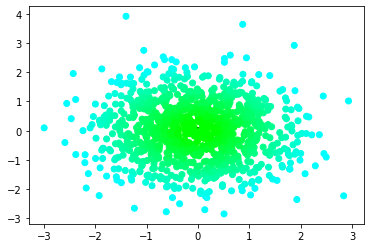

In [40]:
print(points[min])
ax = plt.gca()
# img = plt.imread("heat.png")
# ax.imshow(img, extent=[np.min(points[:, 0]), np.max(points[:, 0]),
#                        np.min(points[:, 1]), np.max(points[:, 1])])
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.show()